## County Population Data of the United States of America

### Cleaning and Prepocessing

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df=pd.read_excel("C:\\Users\\sushe\\OneDrive\\Desktop\\EDA Project Spatial\\County_Population_Center.xlsb", engine='pyxlsb')
display(df.head())

,X,Y,OBJECTID,YEAR,GEOID,STATEFP,COUNTYFP,STNAME,COUNAME,STPOSTAL,POPULATION,LATITUDE,LONGITUDE,NEAR_FID,NEAR_DIST,FEATURE_NAME,FEATURE_CLASS,COUNTY_NAME
0,-86.501832,32.500323,1,2000,1001,1,1,Alabama,Autauga,AL,43671,32.500323,-86.501832,78375,0.015803,Burt Cemetery,Cemetery,Autauga
1,-87.760540,30.565383,2,2000,1003,1,3,Alabama,Baldwin,AL,140415,30.565383,-87.760540,89915,0.010286,Silverhill Cemetery,Cemetery,Baldwin
2,-85.306746,31.847869,3,2000,1005,1,5,Alabama,Barbour,AL,29038,31.847869,-85.306746,116758,0.029414,Cotton Hill,Populated Place,Barbour
3,-87.127019,33.025947,4,2000,1007,1,7,Alabama,Bibb,AL,20826,33.025947,-87.127019,101183,0.007036,Lone Star School (historical),School,Bibb
4,-86.582617,33.962601,5,2000,1009,1,9,Alabama,Blount,AL,51024,33.962601,-86.582617,82423,0.005611,Greens Chapel,Locale,Blount


In [3]:
display(df.describe())

,X,Y,OBJECTID,YEAR,GEOID,STATEFP,COUNTYFP,POPULATION,LATITUDE,LONGITUDE,NEAR_FID,NEAR_DIST
count,9673.000000,9673.000000,9673.000000,9673.000000,9673.000000,9673.000000,9673.000000,9.673000e+03,9673.000000,9673.000000,9.673000e+03,9673.000000
mean,-91.556189,37.920147,4837.000000,2009.989662,31450.763155,31.347772,102.991006,9.643615e+04,37.920147,-91.556189,1.116745e+06,0.010495
std,14.542139,6.203225,2792.498911,8.167491,16331.674272,16.316840,106.909010,3.104459e+05,6.203225,14.542139,6.396134e+05,0.020846
min,-171.044030,-14.337387,1.000000,2000.000000,1001.000000,1.000000,1.000000,6.000000e+00,-14.337387,-171.044030,2.273000e+03,0.000027
25%,-98.061108,34.311974,2419.000000,2000.000000,19035.000000,19.000000,35.000000,1.127600e+04,34.311974,-98.061108,5.300500e+05,0.003819
50%,-89.963255,38.212966,4837.000000,2010.000000,30029.000000,30.000000,79.000000,2.570800e+04,38.212966,-89.963255,1.128683e+06,0.007523
75%,-82.964953,41.685888,7255.000000,2020.000000,46115.000000,46.000000,133.000000,6.479000e+04,41.685888,-82.964953,1.665404e+06,0.013289
max,146.811446,70.636549,9673.000000,2020.000000,78030.000000,78.000000,840.000000,1.001401e+07,70.636549,146.811446,2.212007e+06,1.373439


In [4]:
# Check for missing values
print(df.isnull().sum())


X                0
Y                0
OBJECTID         0
YEAR             0
GEOID            0
STATEFP          0
COUNTYFP         0
STNAME           1
COUNAME          0
STPOSTAL         3
POPULATION       0
LATITUDE         0
LONGITUDE        0
NEAR_FID         0
NEAR_DIST        0
FEATURE_NAME     0
FEATURE_CLASS    0
COUNTY_NAME      0
dtype: int64


In [5]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Check the shape of the cleaned dataset
cleaned_shape = df_cleaned.shape
cleaned_shape

(9670, 18)

### Logarithmic Transformation

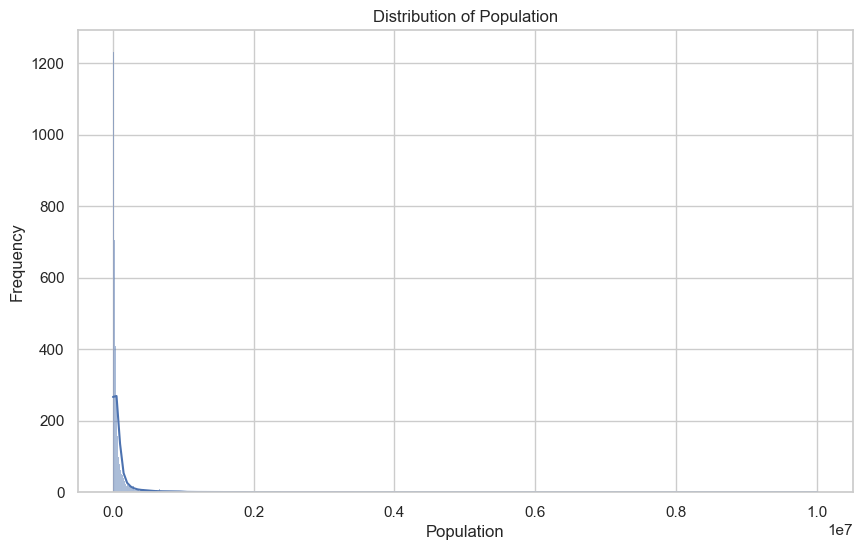

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Plotting the distribution of the 'POPULATION' column
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['POPULATION'], kde=True)
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()



The distribution of the 'POPULATION' column is highly right-skewed, which is a common characteristic of population data. This skewness suggests that a logarithmic transformation could be beneficial, especially if you're planning to perform statistical analyses or linear modeling where normality of the data is important.

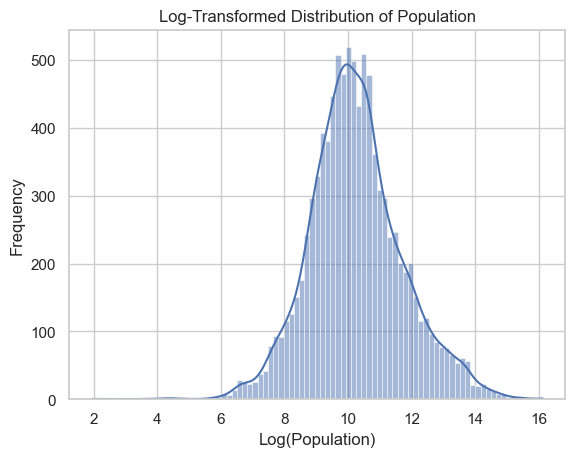

In [7]:
import numpy as np

df_cleaned = df.dropna().copy()
df_cleaned['POPULATION_LOG'] = np.log(df_cleaned['POPULATION'] + 1)

# Plotting the transformed data
sns.histplot(df_cleaned['POPULATION_LOG'], kde=True)
plt.title('Log-Transformed Distribution of Population')
plt.xlabel('Log(Population)')
plt.ylabel('Frequency')
plt.show()


The logarithmic transformation of the 'POPULATION' column has resulted in a distribution that appears more symmetric and less skewed

In [8]:
#Display 5 random rows from the dataset
df_cleaned.sample(5)

,X,Y,OBJECTID,YEAR,GEOID,STATEFP,COUNTYFP,STNAME,COUNAME,STPOSTAL,POPULATION,LATITUDE,LONGITUDE,NEAR_FID,NEAR_DIST,FEATURE_NAME,FEATURE_CLASS,COUNTY_NAME,POPULATION_LOG
7308,-95.988925,42.062617,7309,2020,19133,19,133,Iowa,Monona,IA,8751,42.062617,-95.988925,399248,0.013046,Durr Hill,Summit,Monona,9.077038
2098,-82.794639,40.522781,2099,2000,39117,39,117,Ohio,Morrow,OH,31628,40.522781,-82.794639,966441,0.001425,Morrow County,Civil,Morrow,10.361830
5581,-79.670645,34.635883,5582,2010,45069,45,69,South Carolina,Marlboro,SC,28933,34.635883,-79.670645,1094109,0.003300,Ideal Cemetery,Cemetery,Marlboro,10.272773
3072,-90.899933,44.321354,3073,2000,55053,55,53,Wisconsin,Jackson,WI,19100,44.321354,-90.899933,1441681,0.008021,WWIS-FM (Black River Falls),Tower,Jackson,9.857496
1050,-83.907168,36.901368,1051,2000,21121,21,121,Kentucky,Knox,KY,31795,36.901368,-83.907168,429024,0.008057,Bailey Branch,Stream,Knox,10.367096


### Summary

Data Exploration: Examined the initial structure and content of the dataset.

Handling Missing Values: Identified and removed rows with missing values.

Checking and Retaining Column Names: Kept the original column names as they were suitable for the dataset.

Data Transformation: Applied a logarithmic transformation to the 'POPULATION' column to address the skewness in its distribution.

### Visualization

In [9]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
gdf = gpd.GeoDataFrame(df_cleaned, geometry=gpd.points_from_xy(df_cleaned.LONGITUDE, df_cleaned.LATITUDE))
gdf.crs = 'epsg:4326'

In [10]:
# Identify the latest year in the dataset
latest_year = df['YEAR'].max()


In [11]:
import plotly.express as px

def create_map_for_year(data, year, title):
    # Filter the data for the given year
    year_data = data[data['YEAR'] == year]

    # Create the map
    fig = px.scatter_geo(year_data,
                         lon='LONGITUDE',
                         lat='LATITUDE',
                         size='POPULATION',
                         hover_name='COUNAME',
                         title=title,
                         scope='usa',
                         projection='albers usa',
                         color='POPULATION',
                         color_continuous_scale='Viridis')
    
    # Customize the layout and aesthetics
    fig.update_layout(
        title=dict(
            text=title,
            x=0.5,
            xanchor='center',
            font=dict(
                size=24,
                color='RebeccaPurple'
            )
        ),
        geo=dict(
            landcolor='LightGrey',
            lakecolor='rgba(255, 255, 255, 0)',  # Set lake color to transparent
            oceancolor='rgba(255, 255, 255, 0)'  # Set ocean color to transparent
        ),
        legend=dict(
            title='Population Size',
            font=dict(
                size=12,
                color='DarkBlue'
            )
        )
    )
    
    return fig


In [12]:

# Create and display the map for the latest year
map_latest = create_map_for_year(df, latest_year, f'U.S. Population Centers by County ({latest_year})')
map_latest.show()
map_latest.write_html('C:\\Users\\sushe\\OneDrive\\Desktop\\Plot.html')



In [13]:
import plotly.express as px
import pandas as pd

# Grouping the data by year and summing up the populations
total_population_by_year = df.groupby('YEAR')['POPULATION'].sum()

# Filtering out the years 2000, 2010, and 2020 for the comparison
selected_years = [2000, 2010, 2020]
total_population_selected_years = total_population_by_year[total_population_by_year.index.isin(selected_years)]

# Creating the comparative bar chart for the total U.S. population in 2000, 2010, and 2020
population_trend_chart = px.bar(
    total_population_selected_years,
    title="U.S. Population Growth: A Comparison Across Three Decades (2000, 2010, 2020)",
    labels={'value': 'Total US Population', 'YEAR': 'Census Year'},
    template="plotly_white",
    color_discrete_sequence=px.colors.qualitative.Pastel,
)

# Customizing the layout and font sizes
population_trend_chart.update_layout(
    title_font_size=24,
    title_x=0.5,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_tickfont_size=16,
    xaxis=dict(title_standoff=25),
    yaxis=dict(title_standoff=25),
    showlegend=False
)
population_trend_chart.update_traces(marker_line_width=1.5, selector=dict(type='bar'))

population_trend_chart.show()
population_trend_chart.write_html('C:\\Users\\sushe\\OneDrive\\Desktop\\Plot0.html')


# County

In [14]:
import plotly.express as px
import pandas as pd

# Create a combined column for County and State
df['County_State'] = df['COUNAME'] + ', ' + df['STNAME']

# Calculate the change in population for each county from 2000 to 2020
df_2000 = df[df['YEAR'] == 2000].groupby('County_State')['POPULATION'].sum()
df_2020 = df[df['YEAR'] == 2020].groupby('County_State')['POPULATION'].sum()
population_change = (df_2020 - df_2000).reset_index()
population_change.columns = ['County_State', 'Population Change']

# Top 5 growing and declining counties (with state names)
top_growing = population_change.nlargest(5, 'Population Change')
top_declining = population_change.nsmallest(5, 'Population Change')

# Customizing bar charts
def create_bar_chart(data, title):
    fig = px.bar(
        data, 
        x='County_State', 
        y='Population Change', 
        title=title,
        template='plotly_white',
        color_discrete_sequence=px.colors.qualitative.Pastel  
    )
    fig.update_layout(
        title_font_size=20,
        title_x=0.5,  # Center-align the title
        xaxis_title='County and State',
        yaxis_title='Net Population Change',
        xaxis_tickfont_size=14,
        yaxis_tickfont_size=14
    )
    return fig

# Create bar charts for growing and declining counties
fig_grow = create_bar_chart(top_growing, 'Leading Growth: Top 5 U.S. Counties by Population Increase (2000-2020)')
fig_decline = create_bar_chart(top_declining, 'Significant Decline: Top 5 U.S. Counties by Population Decrease (2000-2020)')

# Show
fig_grow.show()
fig_decline.show()
fig_grow.write_html('C:\\Users\\sushe\\OneDrive\\Desktop\\Plot1.html')
fig_decline.write_html('C:\\Users\\sushe\\OneDrive\\Desktop\\Plot2.html')




In [15]:
import plotly.graph_objs as go

# Aggregate data to calculate average and median county population per state for the year 2020
state_stats_2020 = df[df['YEAR'] == 2020].groupby('STNAME')['POPULATION'].agg(['mean', 'median']).reset_index()

# Create a bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    x=state_stats_2020['STNAME'],
    y=state_stats_2020['mean'],
    name='Average Population',
    marker_color='#1f77b4'  
))
fig.add_trace(go.Bar(
    x=state_stats_2020['STNAME'],
    y=state_stats_2020['median'],
    name='Median Population',
    marker_color='#2ca02c'  
))

# Customize the layout
fig.update_layout(
    title='State-wise Comparison of Average and Median County Population (2020)',
    title_x=0.5,  
    xaxis_title='State',
    yaxis_title='Population (Count)',
    barmode='group',
    template='plotly_white',
    title_font_size=22,
    xaxis_title_font_size=18,
    yaxis_title_font_size=18,
    xaxis_tickfont_size=14,
    yaxis_tickfont_size=14,
    legend_title_font_size=16,
    bargap=0.15  
)

# Save or show the figure
fig.show()
fig.write_html('C:\\Users\\sushe\\OneDrive\\Desktop\\your_plot.html')